In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
def create_iris_dataset():
    print("Creating Iris dataset...")
    iris = load_iris()
    iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                          columns=iris['feature_names'] + ['target'])

    # Convert target to string class names for better readability
    target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    iris_df['species'] = iris_df['target'].map(target_names)

    # Save to CSV
    iris_df.to_csv('iris_dataset.csv', index=False)
    print("Iris dataset saved to 'iris_dataset.csv'")
    return iris_df

In [3]:
def decision_tree_classification():
    # Create dataset if it doesn't exist
    try:
        iris_df = pd.read_csv('iris_dataset.csv')
        print("Loaded existing Iris dataset")
    except FileNotFoundError:
        iris_df = create_iris_dataset()

    print("\nBuilding decision tree classifier...")

    # Prepare features and target
    X = iris_df.drop(['target', 'species'], axis=1)
    y = iris_df['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the decision tree model
    dt_classifier = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = dt_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    target_names = ['setosa', 'versicolor', 'virginica']
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Visualize the decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=target_names, rounded=True)
    plt.title("Decision Tree Visualization")
    plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
    print("Decision tree visualization saved to 'decision_tree_visualization.png'")

    # Visualize feature importance
    feature_importance = dt_classifier.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300)
    print("Feature importance visualization saved to 'feature_importance.png'")

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=300)
    print("Confusion matrix saved to 'confusion_matrix.png'")

    return dt_classifier

Task 1: Decision Tree Classification
Creating Iris dataset...
Iris dataset saved to 'iris_dataset.csv'

Building decision tree classifier...

Model Evaluation:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Decision tree visualization saved to 'decision_tree_visualization.png'
Feature importance visualization saved to 'feature_importance.png'
Confusion matrix saved to 'confusion_matrix.png'

Task completed successfully!


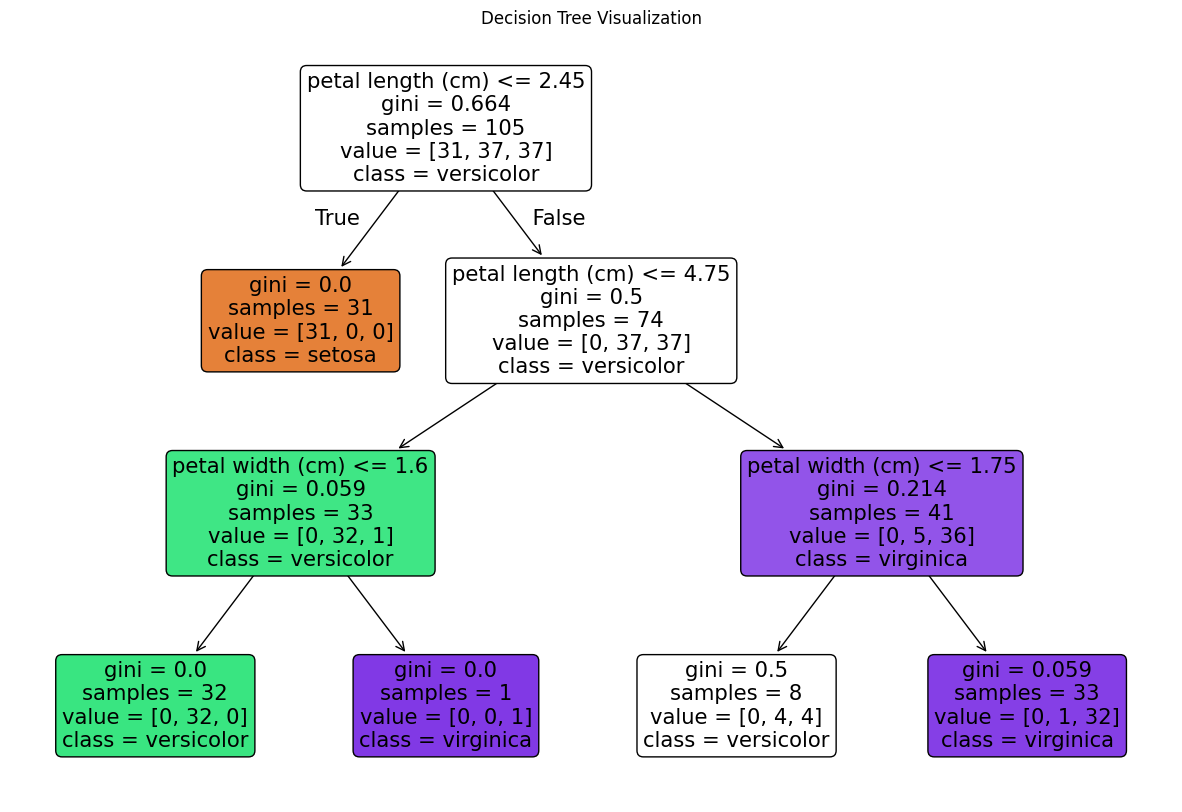

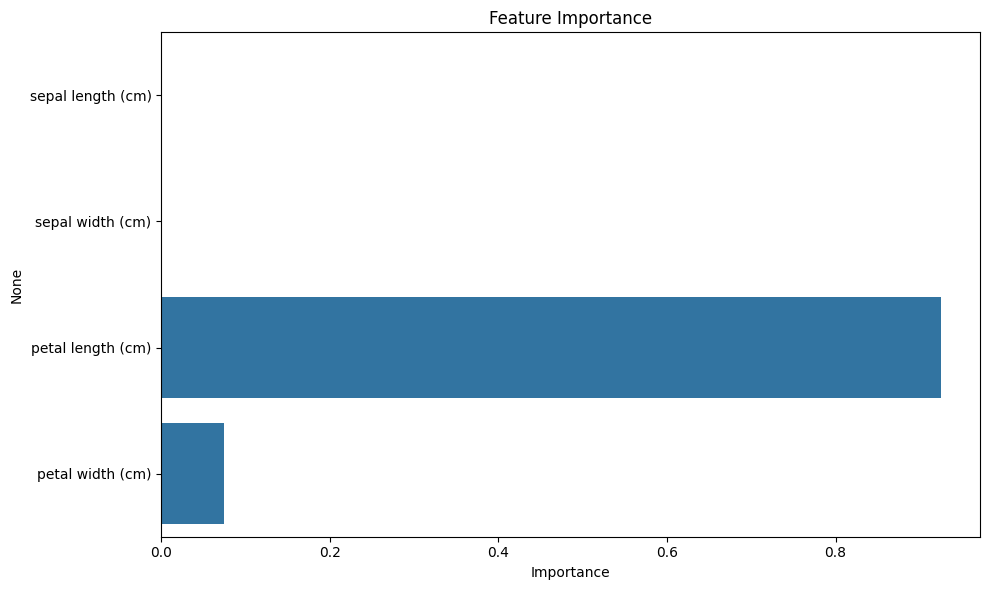

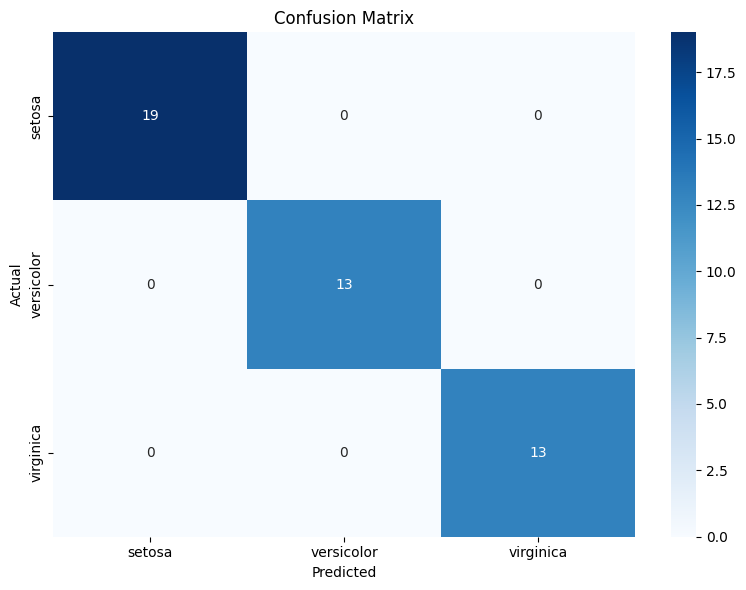

In [4]:
if __name__ == "__main__":
    print("Task 1: Decision Tree Classification")
    print("====================================")
    model = decision_tree_classification()
    print("\nTask completed successfully!")